In [126]:

import pandas as pd
import os

# Check current working directory
print("Current Working Directory:", os.getcwd())

# Assuming 'dataset.csv' is the correct file name and it's located in the current working directory
file_path = 'oreanuolayemi_glucose_13-3-2024.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully")
except FileNotFoundError:
    print(f"File not found: {file_path}")


Current Working Directory: /content
File loaded successfully


In [127]:
df = pd.read_csv('/content/oreanuolayemi_glucose_9-3-2024.csv')
df.head()

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),Carbohydrates (servings),Non-numeric Long-Acting Insulin,Long-Acting Insulin Value (units),Notes,Strip Glucose mmol/L,Ketone mmol/L,Meal Insulin (units),Correction Insulin (units),User Change Insulin (units)
0,FreeStyle LibreLink,7FA6DD94-935B-40AD-888B-6262C473C93C,8/3/2024 9:12,0,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FreeStyle LibreLink,7FA6DD94-935B-40AD-888B-6262C473C93C,8/3/2024 9:27,0,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FreeStyle LibreLink,7FA6DD94-935B-40AD-888B-6262C473C93C,8/3/2024 9:42,0,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FreeStyle LibreLink,7FA6DD94-935B-40AD-888B-6262C473C93C,8/3/2024 9:58,0,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FreeStyle LibreLink,7FA6DD94-935B-40AD-888B-6262C473C93C,8/3/2024 10:13,0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/oreanuolayemi_glucose_9-3-2024.csv')  #  dataset CSV file
ds = pd.read_excel('/content/samps (1).xlsx')  #  sample CSV file
# Convert the 'Device Timestamp' column to datetime to extract date and time
df['Device Timestamp'] = pd.to_datetime(df['Device Timestamp'])

# Extract date and time into separate columns
df['Date'] = df['Device Timestamp'].dt.date
df['Time'] = df['Device Timestamp'].dt.time

# Columns to be dropped
columns_to_drop = [
    'Device', 'Serial Number', 'Device Timestamp', 'Record Type',
    'Non-numeric Rapid-Acting Insulin', 'Rapid-Acting Insulin (units)',
    'Non-numeric Food', 'Carbohydrates (grams)', 'Carbohydrates (servings)',
    'Non-numeric Long-Acting Insulin', 'Long-Acting Insulin Value (units)', 'Notes',
    'Strip Glucose mmol/L', 'Ketone mmol/L', 'Meal Insulin (units)',
    'Correction Insulin (units)', 'User Change Insulin (units)'
]

# Drop the specified columns
df_dropped = df.drop(columns=columns_to_drop, axis=1)

# Show the first few rows of the final dataframe
print(df_dropped.head())


   Historic Glucose mmol/L  Scan Glucose mmol/L        Date      Time
0                      5.3                  NaN  2024-08-03  09:12:00
1                      5.3                  NaN  2024-08-03  09:27:00
2                      5.1                  NaN  2024-08-03  09:42:00
3                      5.3                  NaN  2024-08-03  09:58:00
4                      4.5                  NaN  2024-08-03  10:13:00


In [129]:
df_dropped.to_csv('Glucose.csv')

In [130]:
time = df['Time']
emotion = ds['Emotion']
Activity = ds['Activity']

In [132]:
sample_dataset = pd.DataFrame({'Time':time,'Activity':Activity,'Emotion':emotion})

One Hot Encoding

In [134]:
sample_dataset.to_csv('Sample.csv')

In [133]:
# Merge using an outer join
merged_df_outer = pd.merge(sample_dataset, df_dropped, on='Time', how='inner')

print(merged_df_outer)


         Time  Activity    Emotion  Historic Glucose mmol/L  \
0    09:12:00  sleeping   confused                      5.3   
1    09:12:00  sleeping   confused                      NaN   
2    09:12:00   walking  energetic                      5.3   
3    09:12:00   walking  energetic                      NaN   
4    09:27:00  sleeping      bored                      5.3   
..        ...       ...        ...                      ...   
143  10:23:00   walking      proud                      NaN   
144  08:10:00  sleeping  depressed                      NaN   
145  08:11:00   playing   grateful                      NaN   
146  10:14:00  sleeping  energetic                      NaN   
147  10:15:00   working  motivated                      NaN   

     Scan Glucose mmol/L        Date  
0                    NaN  2024-08-03  
1                    5.5  2024-08-03  
2                    NaN  2024-08-03  
3                    5.5  2024-08-03  
4                    NaN  2024-08-03  
..       

In [135]:
merged_df_outer.to_csv('Final Sheet.csv')

In [136]:
drop_Columns = ['Scan Glucose mmol/L','Date']
Final = merged_df_outer.drop(columns=drop_Columns,axis=1)

In [137]:
mean_glocus = Final['Historic Glucose mmol/L'].mean()
df_filled = Final.fillna(mean_glocus)

In [138]:
import pandas as pd
df_filled = pd.read_csv('/content/Final_Dataset.csv')

In [139]:
df_filled.to_csv('Final_Dataset.csv')

# Data Preparation

In [140]:
df_filled

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Time,Activity,Emotion,Historic Glucose mmol/L
0,0,0,0,0,0,09:12:00,NaN,NaN,5.300000
1,1,1,1,1,1,09:12:00,NaN,NaN,4.700000
2,2,2,2,2,2,09:12:00,NaN,NaN,5.200000
3,3,3,3,3,3,09:12:00,NaN,NaN,5.383774
4,4,4,4,4,4,09:12:00,NaN,NaN,5.300000
...,...,...,...,...,...,...,...,...,...
956,956,956,956,956,956,13:10:00,NaN,NaN,5.383774
957,957,957,957,957,957,02:11:00,NaN,NaN,5.383774
958,958,958,958,958,958,08:10:00,NaN,NaN,5.383774
959,959,959,959,959,959,10:14:00,NaN,NaN,5.383774


In [141]:
# Mapping dictionary for transforming values
activity_mapping = {'sleeping': 0, 'walking': 1, 'playing': 2,'working':3,'meditating':4,'studying':5,'shopping':6,'running':7,'cooking':8,'eating':9}
emotion_mapping = {'confused': 0, 'surprised': 1, 'content': 2, 'calm': 3, 'bored': 4,'amused': 5, 'sad': 6, 'excited': 7, 'hopeful': 8,'indifferent': 9,'grateful': 10, 'energetic': 11,  'tired' : 12, 'motivated' : 13, 'depressed': 14, 'proud':15 , 'confident' : 16, 'happy': 17, 'lonely': 18, 'inspired': 19, 'angry': 20, 'pensive': 21, 'stressed': 22, 'frustrated' : 23, 'relaxed' : 24, 'anxious': 25}





# Transform 'Activity' and 'Emotion' columns into numerical labels
df_filled['Activity'] = df_filled['Activity'].map(activity_mapping)
df_filled['Emotion'] = df_filled['Emotion'].map(emotion_mapping)

In [142]:
df_filled=df_filled.drop(columns='Unnamed: 0', axis = 1)

# Plots

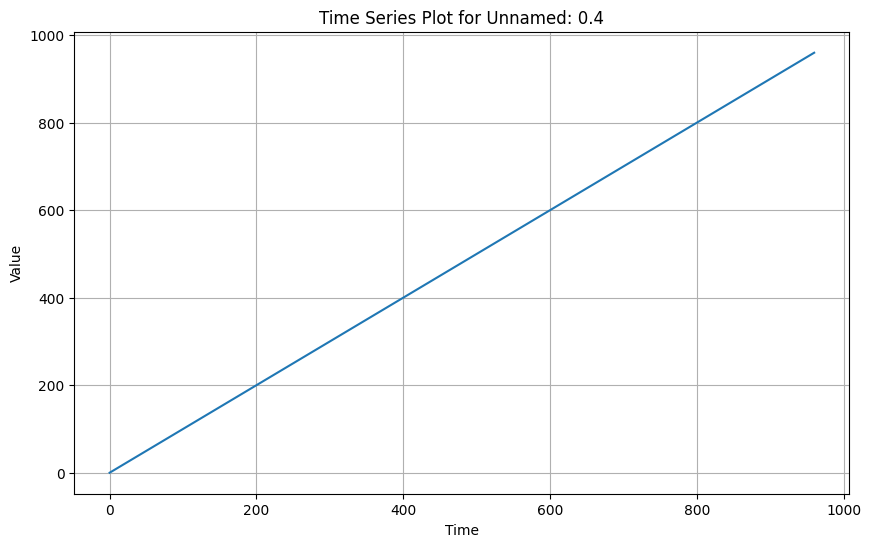

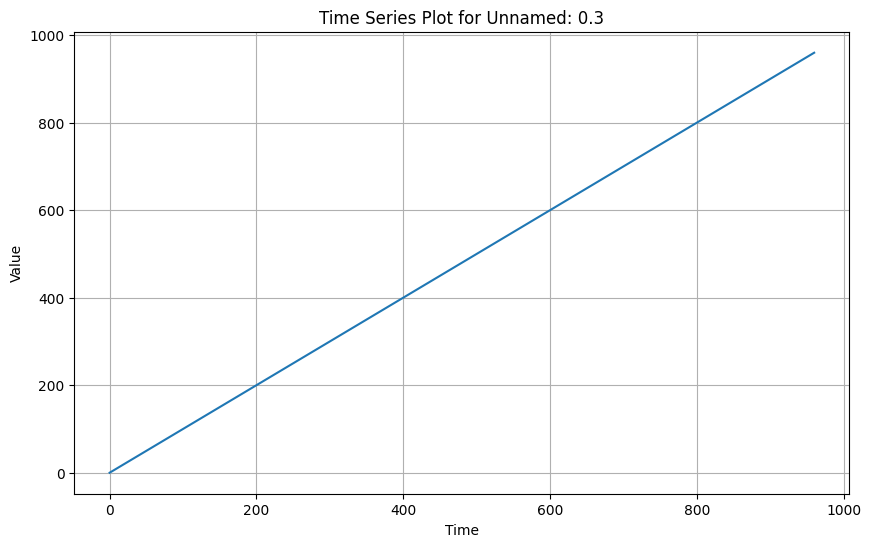

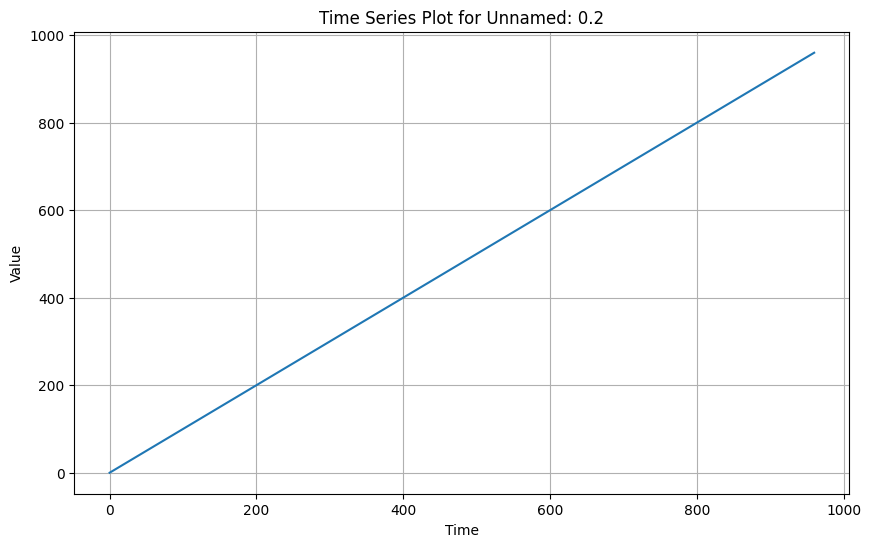

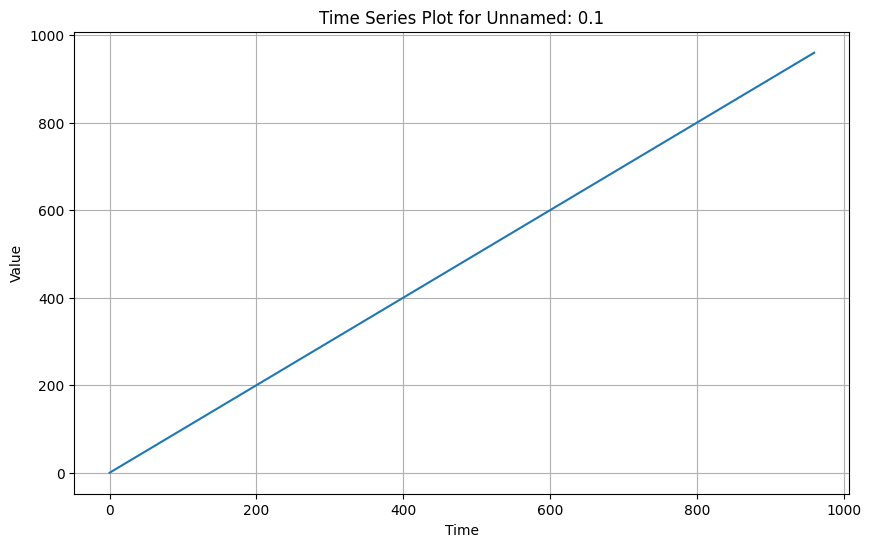

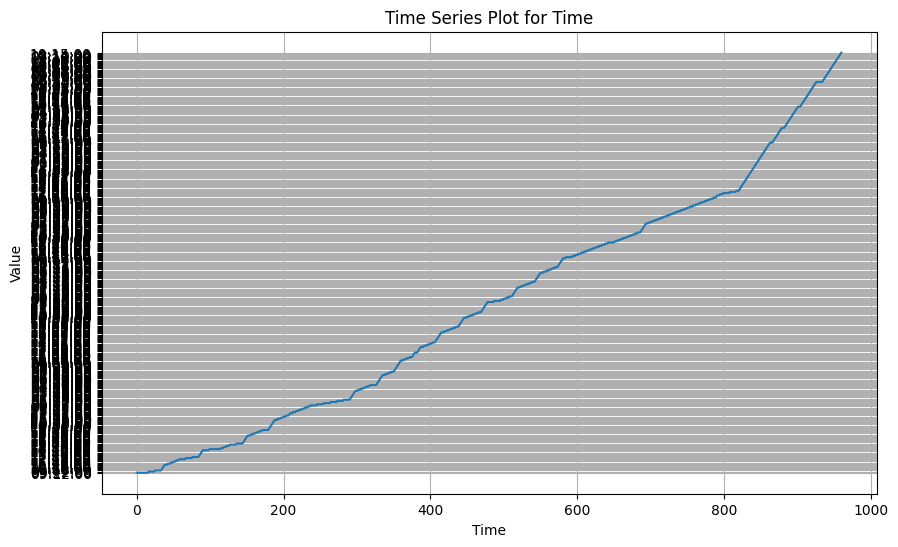

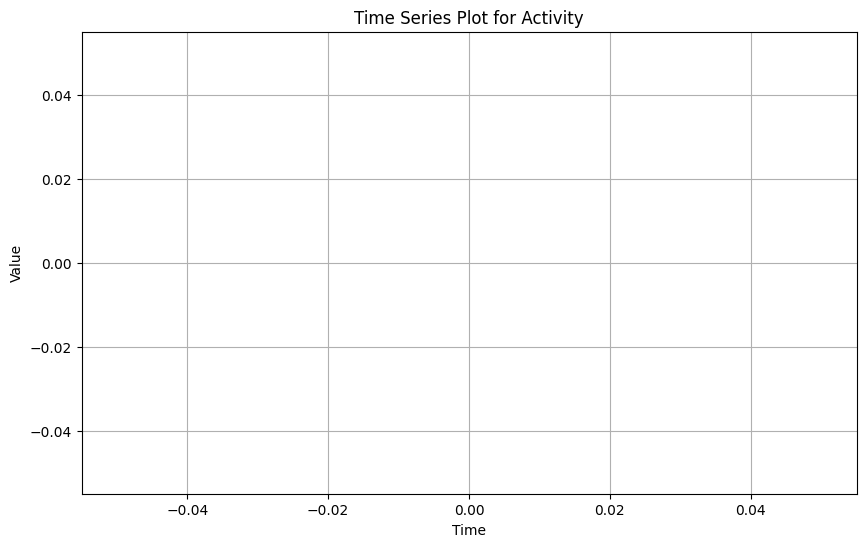

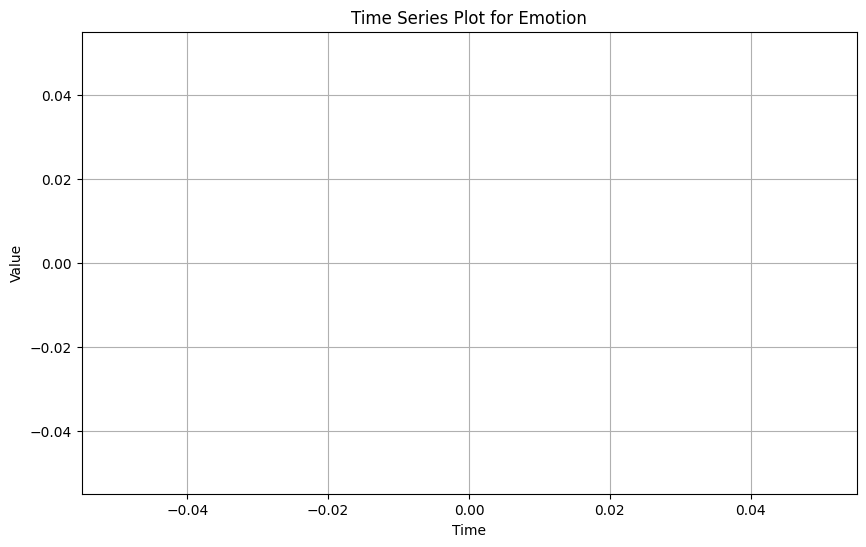

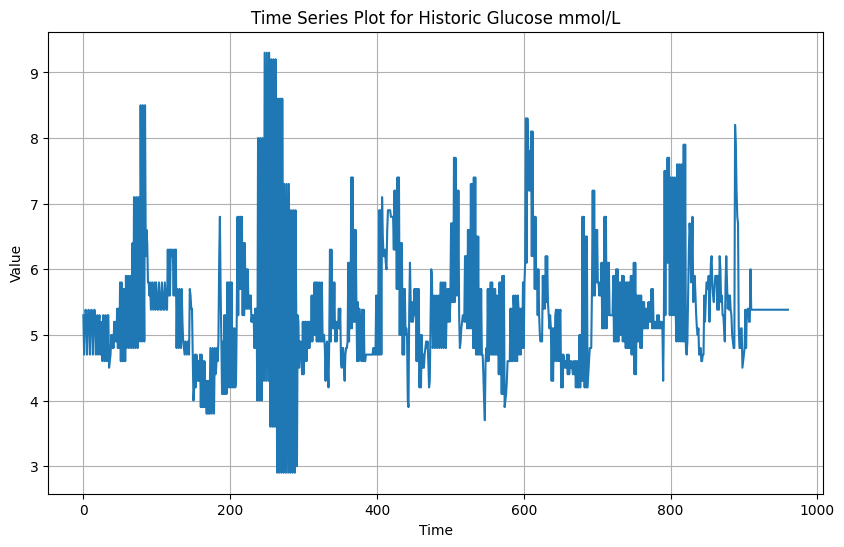

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filled is your DataFrame with a time column named 'Time'

# Set the 'Time' column as the index if it's not already
# df_filled.set_index('Time', inplace=True)

# Get the list of features (columns) in the DataFrame
features = df_filled.columns

# Plot time series for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.plot(df_filled.index, df_filled[feature])
    plt.title(f'Time Series Plot for {feature}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()


In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()

# df_filled['Activity'] = label_encoder.fit_transform(df_filled['Activity'])
# df_filled['Emotion'] = label_encoder.fit_transform(df_filled['Emotion'])

# # Save the modified DataFrame back to a CSV file
# #df.to_csv('modified_data.csv', index=False)

# print("DataFrame after converting categorical columns to numerical values:")
# print(df_filled)

# Training pipeline


Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named df_filled and it contains features and labels

# Step 1: Split data into features (X) and labels (y)
X = df_filled.drop(columns=['Time', 'Activity', 'Emotion'])  # Features
y_activity = df_filled['Activity']  # Activity labels
y_emotion = df_filled['Emotion']    # Emotion labels

# Step 2: Split data into training and testing sets (70/30 split) for activity prediction
X_train_activity, X_test_activity, y_train_activity, y_test_activity = train_test_split(X, y_activity, test_size=0.3, random_state=42)

# Step 3: Initialize Decision Tree classifier for activity prediction
classifier_activity = DecisionTreeClassifier()

# Step 4: Perform 10-fold cross-validation for activity prediction
activity_scores = cross_val_score(classifier_activity, X_train_activity, y_train_activity, cv=10)

# Step 5: Train the classifier on the entire training data for activity prediction
classifier_activity.fit(X_train_activity, y_train_activity)

# Step 6: Evaluate the classifier on the testing data for activity prediction
y_pred_activity = classifier_activity.predict(X_test_activity)

# Calculate accuracy for activity prediction
accuracy_activity = accuracy_score(y_test_activity, y_pred_activity)
print("Accuracy for Activity Prediction:", accuracy_activity)

# Repeat steps 2-6 for emotion prediction
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(X, y_emotion, test_size=0.3, random_state=42)

classifier_emotion = DecisionTreeClassifier()

# Perform 10-fold cross-validation for emotion prediction
emotion_scores = cross_val_score(classifier_emotion, X_train_emotion, y_train_emotion, cv=10)

classifier_emotion.fit(X_train_emotion, y_train_emotion)
y_pred_emotion = classifier_emotion.predict(X_test_emotion)
accuracy_emotion = accuracy_score(y_test_emotion, y_pred_emotion)
print("Accuracy for Emotion Prediction:", accuracy_emotion)

# Print cross-validation scores
print("Cross-validation scores for Activity Prediction:", activity_scores)
print("Mean cross-validation score for Activity Prediction:", activity_scores.mean())

print("Cross-validation scores for Emotion Prediction:", emotion_scores)
print("Mean cross-validation score for Emotion Prediction:", emotion_scores.mean())


Accuracy for Activity Prediction: 0.22837370242214533
Accuracy for Emotion Prediction: 0.3460207612456747
Cross-validation scores for Activity Prediction: [0.30882353 0.23529412 0.29850746 0.25373134 0.2238806  0.35820896
 0.29850746 0.25373134 0.41791045 0.13432836]
Mean cross-validation score for Activity Prediction: 0.2782923617208078
Cross-validation scores for Emotion Prediction: [0.30882353 0.30882353 0.32835821 0.19402985 0.17910448 0.31343284
 0.31343284 0.37313433 0.28358209 0.23880597]
Mean cross-validation score for Emotion Prediction: 0.2841527655838455


SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named df_filled and it contains features and labels

# Step 1: Split data into features (X) and labels (y)
X = df_filled.drop(columns=['Time', 'Activity', 'Emotion'])  # Features
y_activity = df_filled['Activity']  # Activity labels
y_emotion = df_filled['Emotion']    # Emotion labels

# Step 2: Split data into training and testing sets (70/30 split) for activity prediction
X_train_activity, X_test_activity, y_train_activity, y_test_activity = train_test_split(X, y_activity, test_size=0.3, random_state=42)

# Step 3: Initialize SVM classifier for activity prediction
classifier_activity = SVC()

# Step 4: Perform 10-fold cross-validation for activity prediction
activity_scores = cross_val_score(classifier_activity, X_train_activity, y_train_activity, cv=10)

# Step 5: Train the classifier on the entire training data for activity prediction
classifier_activity.fit(X_train_activity, y_train_activity)

# Step 6: Evaluate the classifier on the testing data for activity prediction
y_pred_activity = classifier_activity.predict(X_test_activity)

# Calculate accuracy for activity prediction
accuracy_activity = accuracy_score(y_test_activity, y_pred_activity)
print("Accuracy for Activity Prediction:", accuracy_activity)

# Repeat steps 2-6 for emotion prediction
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(X, y_emotion, test_size=0.3, random_state=42)

classifier_emotion = SVC()

# Perform 10-fold cross-validation for emotion prediction
emotion_scores = cross_val_score(classifier_emotion, X_train_emotion, y_train_emotion, cv=10)

classifier_emotion.fit(X_train_emotion, y_train_emotion)
y_pred_emotion = classifier_emotion.predict(X_test_emotion)
accuracy_emotion = accuracy_score(y_test_emotion, y_pred_emotion)
print("Accuracy for Emotion Prediction:", accuracy_emotion)

# Print cross-validation scores
print("Cross-validation scores for Activity Prediction:", activity_scores)
print("Mean cross-validation score for Activity Prediction:", activity_scores.mean())

print("Cross-validation scores for Emotion Prediction:", emotion_scores)
print("Mean cross-validation score for Emotion Prediction:", emotion_scores.mean())


Accuracy for Activity Prediction: 0.10726643598615918
Accuracy for Emotion Prediction: 0.03806228373702422
Cross-validation scores for Activity Prediction: [0.16176471 0.08823529 0.10447761 0.08955224 0.1641791  0.10447761
 0.08955224 0.07462687 0.1641791  0.10447761]
Mean cross-validation score for Activity Prediction: 0.11455223880597017
Cross-validation scores for Emotion Prediction: [0.01470588 0.02941176 0.04477612 0.01492537 0.08955224 0.
 0.01492537 0.02985075 0.02985075 0.01492537]
Mean cross-validation score for Emotion Prediction: 0.028292361720807725
